In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
def mutFreqs(iters, popSize, prob):
  mutFreqDist = []
  for i in range(iters): #iters = percent (poll)
    pop = np.random.choice(range(0,2),size = popSize, p = [1-prob, prob], replace = True ) #prob mutant = 0.1, normy = 0.9
    mutFreq = np.mean(pop)    #find percent of muts
    mutFreqDist.append(mutFreq)   #add average to mutFreqDist list
  return mutFreqDist


0.09854000000000002
0.029608586592405926


[Text(0.5, 1.0, 'Distrubtions of Mutant Frequencies'),
 Text(0.5, 0, 'Mutant Freqs'),
 Text(0, 0.5, 'count')]

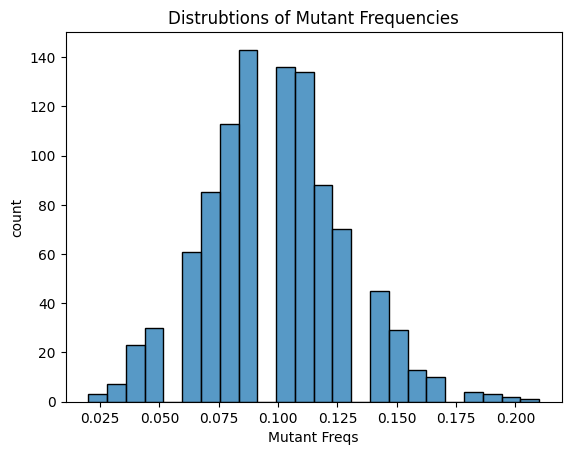

In [ ]:
mutFreqs
mutF = mutFreqs(1000, 100, 0.1) #0.1 probablity of mut
print (np.mean(mutF))
print (np.std(mutF))
sns.histplot(mutF).set(title = "Distrubtions of Mutant Frequencies",xlabel='Mutant Freqs', ylabel='count')

In [ ]:
mfse = []
for i in range(50,1001,50):
  mF = mutFreqs(prob = 0.1, iters = 500, popSize = i)
  mfse.append(np.std(mF)) #std of list not whole list

print(mfse)

[0.04267690710442827, 0.03024049602767785, 0.025907994476180085, 0.020735293583646217, 0.019452466784446645, 0.01763344801474995, 0.01678923950824772, 0.015409006295021104, 0.013706266026714266, 0.01313482759688912, 0.013503405631038549, 0.01200871720413504, 0.011423411650107452, 0.011588388276940967, 0.01094518869437871, 0.010954924406402812, 0.010415723009621023, 0.009354911300065797, 0.009580933050405032, 0.009452338546624322]


In [ ]:
d1 = {
    "stdErrs": mfse,
    "popSizes": np.arange(50,1001,50),
    "type": ["simulation"]*len(mfse)
}

df1 = pd.DataFrame(d1)


$StdError =  \sqrt \frac{p(1-p)}{n}  $

In [ ]:
se = []
for i in range(50,1001,50):
  se.append(np.sqrt(0.1*(1-0.1)/i))



In [ ]:
d2 = {
    "stdErrs": se,
    "popSizes": np.arange(50,1001,50),
    "type": ["actual"]*len(se)
}

df2 = pd.DataFrame(d2)

In [ ]:
df2

df = pd.concat([df1, df2],axis = 0)
df

,stdErrs,popSizes,type
0,0.042677,50,simulation
1,0.030240,100,simulation
2,0.025908,150,simulation
3,0.020735,200,simulation
4,0.019452,250,simulation
5,0.017633,300,simulation
6,0.016789,350,simulation
7,0.015409,400,simulation
8,0.013706,450,simulation
9,0.013135,500,simulation


<Axes: xlabel='popSizes', ylabel='stdErrs'>

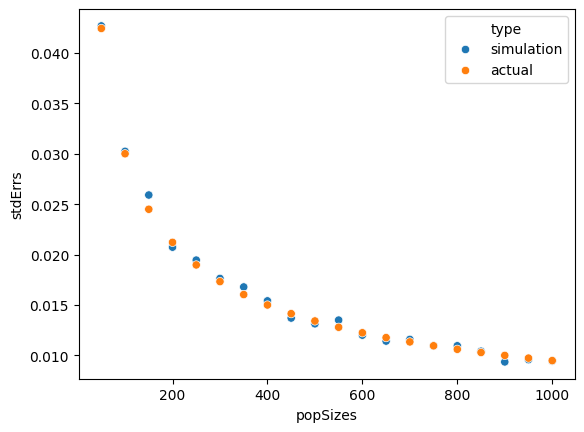

In [ ]:
sns.scatterplot(y= df['stdErrs'], x= df['popSizes'], hue = df["type"])

